In [50]:
import gym
import neat
import numpy as np
import matplotlib.pyplot as plt

# Initialize Blackjack environment
env = gym.make('Blackjack-v1', natural=False, sab=False)

# Define the fitness function
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitness = 0.0

        episode_count = 20
        for _ in range(episode_count):  # Run 10 episodes per genome
            observation = env.reset()[0] # vraci to dict
            terminated = False

            while not terminated:
                action = np.argmax(net.activate(observation))
                observation, reward, terminated, _, _ = env.step(action)
                fitness += reward
        genome.fitness = fitness / float(episode_count)  # Average fitness over 10 episodes

config_path = 'config-feedforward-blackjack'
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

population = neat.Population(config)
population.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
population.add_reporter(stats)

winner = population.run(eval_genomes, 60)



 ****** Running generation 0 ****** 

Population's average fitness: -0.50950 stdev: 0.42250
Best fitness: 0.30000 - size: (3, 6) - species 1 - id 51
Average adjusted fitness: 0.368
Mean genetic distance 2.476, standard deviation 0.596
Population of 200 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    15     -0.5    0.372     0
     2    0    82     -0.4    0.468     0
     3    0    86     -0.7    0.262     0
     4    0    17     -0.5    0.372     0
Total extinctions: 0
Generation time: 0.624 sec

 ****** Running generation 1 ****** 

Population's average fitness: -0.37950 stdev: 0.37024
Best fitness: 0.30000 - size: (3, 6) - species 4 - id 64
Average adjusted fitness: 0.450
Mean genetic distance 2.183, standard deviation 0.554
Population of 200 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    56     -0.5    0.405     0
     2    1   102     

In [51]:
import time
env = gym.make('Blackjack-v1', render_mode="human")
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
terminated = False
observation =  env.reset()[0]
while not terminated:
    neural_network_output = winner_net.activate(observation)
    action = np.argmax(neural_network_output)
    observation, reward, terminated, _, _ = env.step(action)
    time.sleep(1)
env.close()

In [52]:
env = gym.make('Blackjack-v1')

winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
total_reward = 0
rounds = 100
for _ in range(rounds):  # Run 5 episodes to see the winning network in action
    terminated = False
    observation =  env.reset()[0]
    while not terminated:
        neural_network_output = winner_net.activate(observation)
        action = np.argmax(neural_network_output)
        observation, reward, terminated, _, _ = env.step(action)
        total_reward += reward
        
env.close()
print(f"Average reward: {total_reward/rounds}")


Average reward: -0.09


In [53]:
import visualize

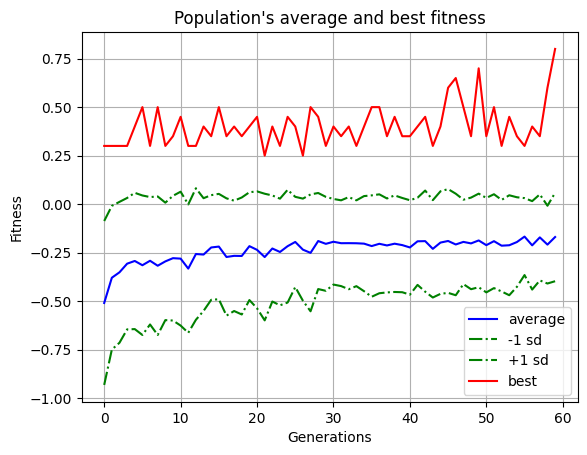

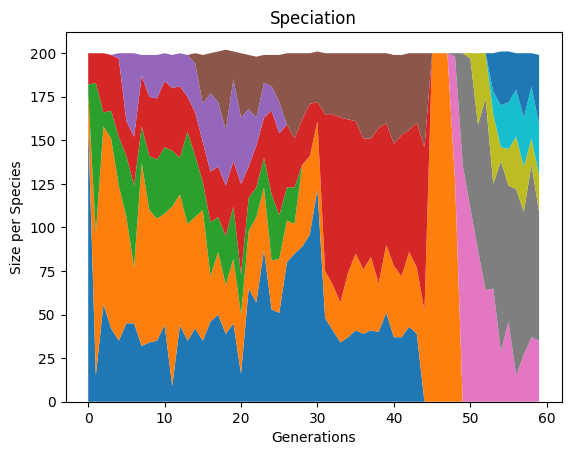

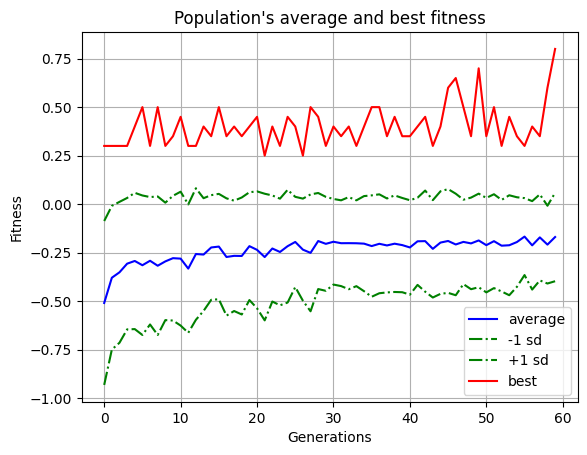

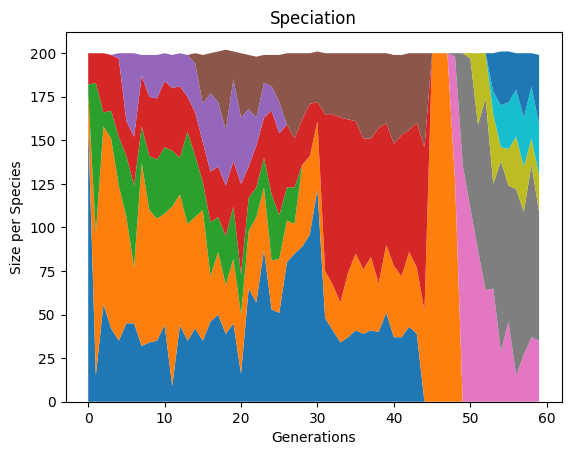

In [54]:

# Plot the statistics
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)